# Import Data

In [101]:
import pandas as pd
import seaborn as sns

exel = pd.ExcelFile('crime.xls')
df = exel.parse('Лист1')
df = df.astype(np.float64)
df = df[['R','ED','NW']]
df.head()

,R,ED,NW
1,79.1,91.0,301.0
2,163.5,113.0,102.0
3,57.8,89.0,219.0
4,196.9,121.0,80.0
5,123.4,121.0,30.0


* R: Crime rate: the number of offenses reported to police per million population 
* ED: Mean of the number of years of schooling x 10 for persons of age 25 or older 
* NW: The number of non-whites per 1000 population 

In [102]:
ed = df[['ED']].values
nw = df[['NW']].values
r = df[['R']].values

In [108]:
import numpy as np
X = np.concatenate([ed,nw], axis=1)
# normalize
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)


# Explore The Effect of _ED_ and _NW_ on _R_

## Visually

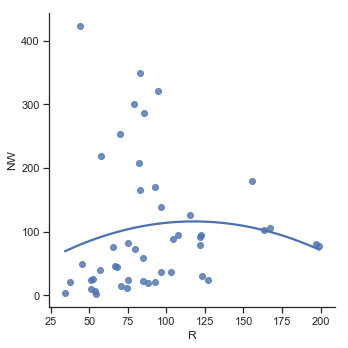

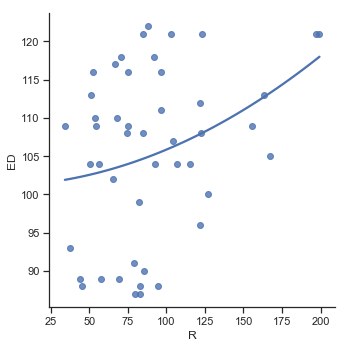

In [124]:
ax = sns.lmplot('R', 'NW', df, ci=None, order=2, truncate=True),
sns.lmplot('R', 'ED', df, ci=None, order=2, truncate=True);

On the first sight there is no dependancy between __NW__, __ED__ and __R__.

In [70]:
import scipy.stats as stats

chisq, p_value = stats.chisquare(r, ed)
chisq, p_value

alpha = 0.05
"independent" if p_value < alpha else 'dependent', p_value

('independent', array([1.28168949e-110]))

In [71]:
import scipy.stats as stats

chisq, p_value = stats.chisquare(r, nw)
chisq, p_value

alpha = 0.05
"independent" if p_value < alpha else 'dependent', p_value

('independent', array([0.]))

# Build Linear Model

In [72]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)
# The coefficients
print('Coefficients: ', regr.coef_, regr.intercept_)
y

Coefficients:  [23.62621367 16.95595822] 90.50851063829788


In [73]:
regr.score(X, y) # Returns the coefficient of determination R^2 of the prediction.

0.21378861933660565

In [74]:
import statsmodels.api as sm
from scipy import stats

est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.7538
Date:                Wed, 05 Dec 2018   Prob (F-statistic):              0.476
Time:                        19:16:34   Log-Likelihood:                -281.54
No. Observations:                  47   AIC:                             567.1
Df Residuals:                      45   BIC:                             570.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            23.6262     19.290      1.225      0.2

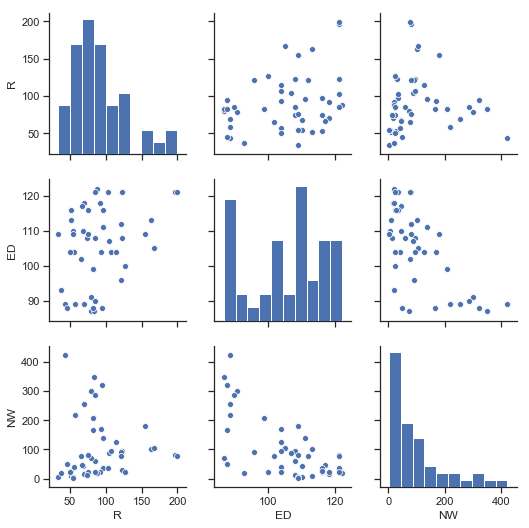

In [76]:
import seaborn as sns
g = sns.pairplot(df)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


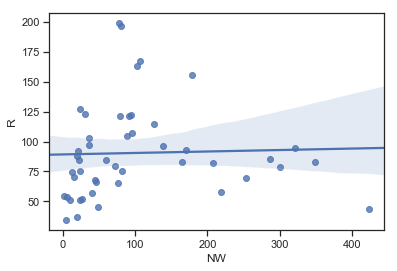

In [83]:
sns.regplot(x="NW", y="R", data=df);

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


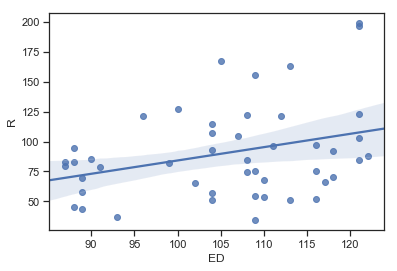

In [85]:
s = sns.regplot(x="ED", y="R", data=df)

In [91]:
from statsmodels.formula.api import ols
linmod = ols('R ~ NW + ED', data=df).fit()
linmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     5.982
Date:                Wed, 05 Dec 2018   Prob (F-statistic):            0.00503
Time:                        19:35:05   Log-Likelihood:                -232.33
No. Observations:                  47   AIC:                             470.7
Df Residuals:                      44   BIC:                             476.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -151.8604     70.256     -2.162      0.036    -293.452     -10.269
NW             0.1667      0.067      2.476      0.017       0.031       0.302
ED             2.1348      0.619      3.450      0.001       0.888       3.382
==============================================================================
Omnibus:                        5.179   Durbin-Watson:                   2.625
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                4.614
Skew:                           0.767   Prob(JB):                       0.0995
Kurtosis:                       3.044   Cond. No.                     2.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
aov_table = sm.stats.anova_lm(linmod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
NW,7539.175527,1.0,6.131832,0.017195
ED,14637.517716,1.0,11.905120,0.001247
Residual,54098.636355,44.0,NaN,NaN
